# Multivariate Linear Regression
### Hypothesis
$$ h_{\theta}(x_i) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$
### Cost Function
$$ J(\theta) = \frac{1}{2 m} \sum_{i=1}^{m} ( h_{\theta}(x_i) - y_i)^2 $$


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
data = pd.read_csv('Practice\Machine Learning\machine-learning-ex1\machine-learning-ex1\ex1\ex1data2.txt', sep=',', header=None)
data.columns = ["House Size", "No of Bedrooms", "Price"]
m = data.size
data.head()

,House Size,No of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data.describe()

,House Size,No of Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Feature Scaling and Mean Normalization
### Mean Normalization
$ x_j := x_j - \mu_j $ where $ \mu_j $ is the average of all the values for feature

### Feature Scaling
$ x_j := \frac{x_j}{s_j} $ where $ s_j $ is the range/standard deviation of all the values for feature j

We do both, so
$$ x_j := \frac{x_j - \mu_j}{s_j} $$

In [4]:
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
theta = np.array([0.0]*3)

mean = X.mean()
std_ = X.std()
X = X-mean
for col in X:
    X.loc[:, col] = X[col]/std_[col]
X.insert(0, 'x_0', 1.0)
X.head()

,x_0,House Size,No of Bedrooms
0,1.0,0.130010,-0.223675
1,1.0,-0.504190,-0.223675
2,1.0,0.502476,-0.223675
3,1.0,-0.735723,-1.537767
4,1.0,1.257476,1.090417


In [5]:
def computeCost(X, y, theta):
    m = y.size
    return 1/(2*m) * np.sum( np.power( X.dot(theta) - y, 2 ) )

In [6]:
def grad_desc(X, y, theta, iter=200, alpha=0.1):
    m = y.size
    cost_history = np.zeros(iter)
    theta_history = np.zeros((iter, theta.size))
    for it in range(iter):
        theta = theta - alpha/m * X.T.dot((X.dot(theta)-y))
        theta_history[it, :] = theta.T
        cost_history[it] = computeCost(X, y, theta)
    return theta, theta_history, cost_history

In [7]:
theta, thetas, costs = grad_desc(X, y, theta, iter= 50, alpha=0.3)
print("Cost:", computeCost(X, y, theta))
theta

Cost: 2043281503.7950873


x_0               340412.653452
House Size        110572.961931
No of Bedrooms     -6591.385923
dtype: float64

## Learning Curve

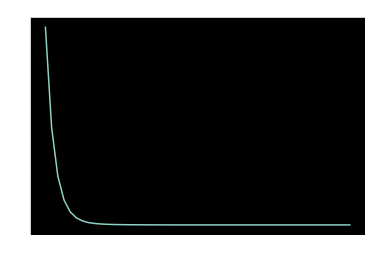

In [8]:
plt.plot(np.arange(0, 50, 1), costs)
plt.show()

## Predicting Prices

In [9]:
price = theta['x_0'] + (1650-mean['House Size'])/std_['House Size']*theta['House Size'] + (3-mean['No of Bedrooms'])/std_['No of Bedrooms']*theta['No of Bedrooms']
print(price)

293094.0981218172


## Solving with Normal Equation

In [10]:
X_ = data.iloc[:, 0:2]
X_.insert(0, 'x_0', 1.0)
y_ = data.iloc[:, 2]
theta_n = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y_)
price_n = theta_n[0] + 1650 * theta_n[1] + 3 * theta_n[2]
print(theta, theta_n)
print(price_n)

x_0               340412.653452
House Size        110572.961931
No of Bedrooms     -6591.385923
dtype: float64 [89597.9095428    139.21067402 -8738.01911233]
293081.4643348957


In [13]:
# hs = 800-4500, #b = 2-6
hs = np.linspace(800, 4500, 100)
b_ = np.linspace(1, 6, 6)
hs, b_ = np.meshgrid(hs, b_)
prices_ = hs+b_
for i in range(6):
    for j in range(100):
        prices_[i][j] = theta['x_0'] + (hs[i][j]-mean['House Size'])/std_['House Size']*theta['House Size'] + (b_[i][j]-mean['No of Bedrooms'])/std_['No of Bedrooms']*theta['No of Bedrooms']

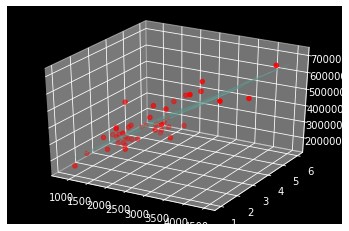

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(hs, b_, prices_)
ax.scatter(X_.iloc[:, 1], X_.iloc[:, 2], y, c='r')
plt.show()